# Actividad 3 - Series de Tiempo

> Alfonso Pineda | A01660394  
Mariana Rincón | A01654973  
Karla González | A01541526  
Salvador Mendoza | A01067783  
Álvaro Morán Errejón | A01638034

**Fecha de entrega:** 

---

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('dow_jones_index.data')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


### Preprocesamiento de datos

In [4]:
# Eliminamos las columnas que no nos interesan
df.drop(['quarter', 'stock', 'open', 'close', 'percent_change_volume_over_last_wk', 'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close', 'percent_change_next_weeks_price', 'days_to_next_dividend', 'percent_return_next_dividend'], axis=1, inplace=True)

In [5]:
# Verificar valores nulos en el DataFrame
print(df.isnull().sum())

date                    0
high                    0
low                     0
volume                  0
percent_change_price    0
dtype: int64


In [6]:
# Eliminamos el signo '$' y convertimos las correspondientes columnas a tipo float
df['high'] = df['high'].replace('[\$,]', '', regex=True).astype(float)
df['low'] = df['low'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  750 non-null    object 
 1   high                  750 non-null    float64
 2   low                   750 non-null    float64
 3   volume                750 non-null    int64  
 4   percent_change_price  750 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 29.4+ KB


In [8]:
df.index

RangeIndex(start=0, stop=750, step=1)

In [9]:
df.index = pd.to_datetime(df['date'])
df.drop(['date'], axis=1, inplace=True)

In [ ]:
# Definimos la columna 'month' para agrupar los datos por mes
df['month'] = df.index.month

# Definimos la columna 'day' para agrupar los datos por día
df['day'] = df.index.day

# Definimos la columna 'day_of_week' pra agrupar los datos por día de la semana
df['day_of_week'] = df.index.dayofweek

In [11]:
# Calcular el promedio por día
df_mean = df.groupby(df.index).mean()

In [12]:
df_mean.groupby(df_mean.index).count()

,high,low,volume,percent_change_price,month,day,day_of_week
date,,,,,,,
2011-01-07,1,1,1,1,1,1,1
2011-01-14,1,1,1,1,1,1,1
2011-01-21,1,1,1,1,1,1,1
2011-01-28,1,1,1,1,1,1,1
2011-02-04,1,1,1,1,1,1,1
2011-02-11,1,1,1,1,1,1,1
2011-02-18,1,1,1,1,1,1,1
2011-02-25,1,1,1,1,1,1,1
2011-03-04,1,1,1,1,1,1,1


### Lectura y visualización de datos

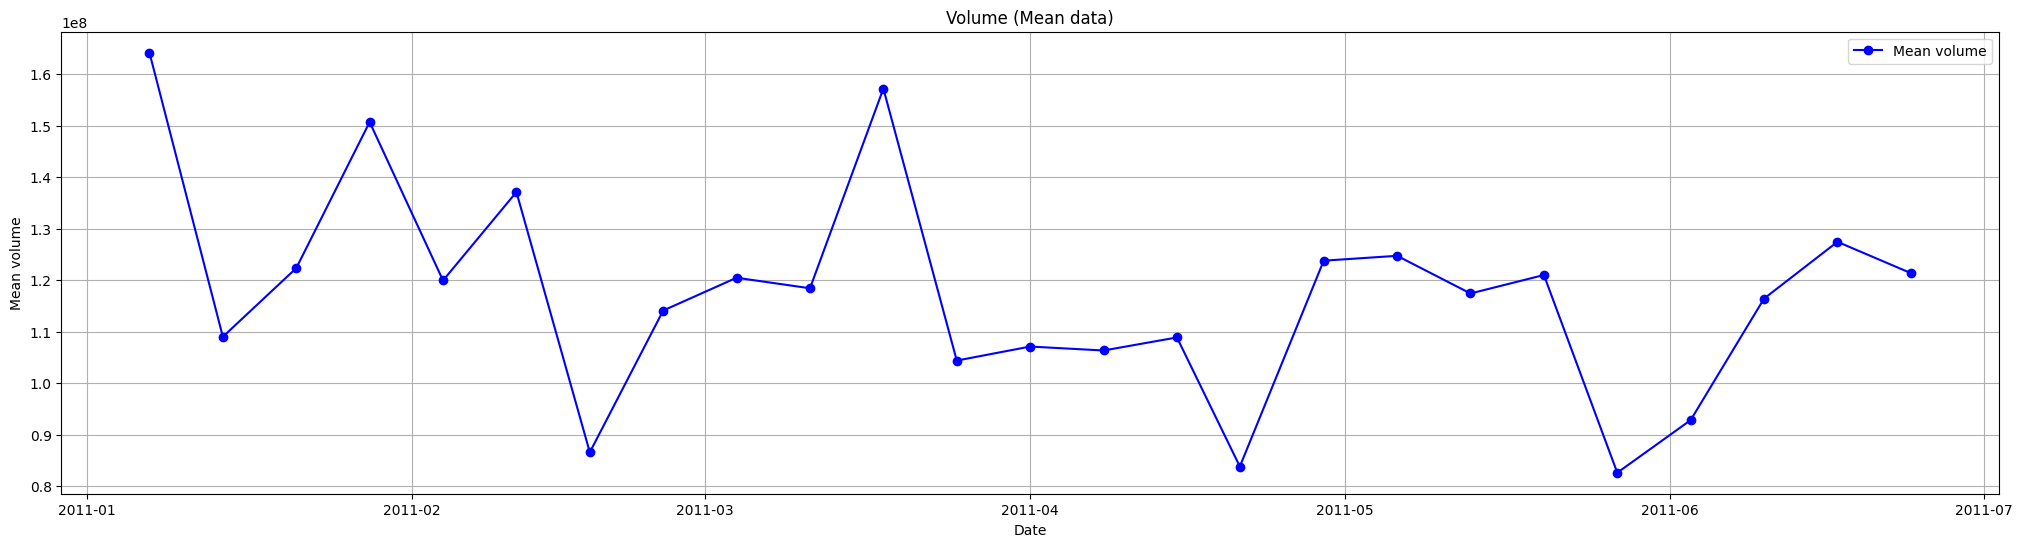

In [16]:
fig = plt.figure(figsize=(25, 6))

plt.plot(df_mean.index, df_mean['volume'], 'bo-',label='Mean volume')
plt.title('Volume (Mean data)')
plt.xlabel('Date')
plt.ylabel('Mean volume')
plt.legend()
plt.grid()
plt.show()

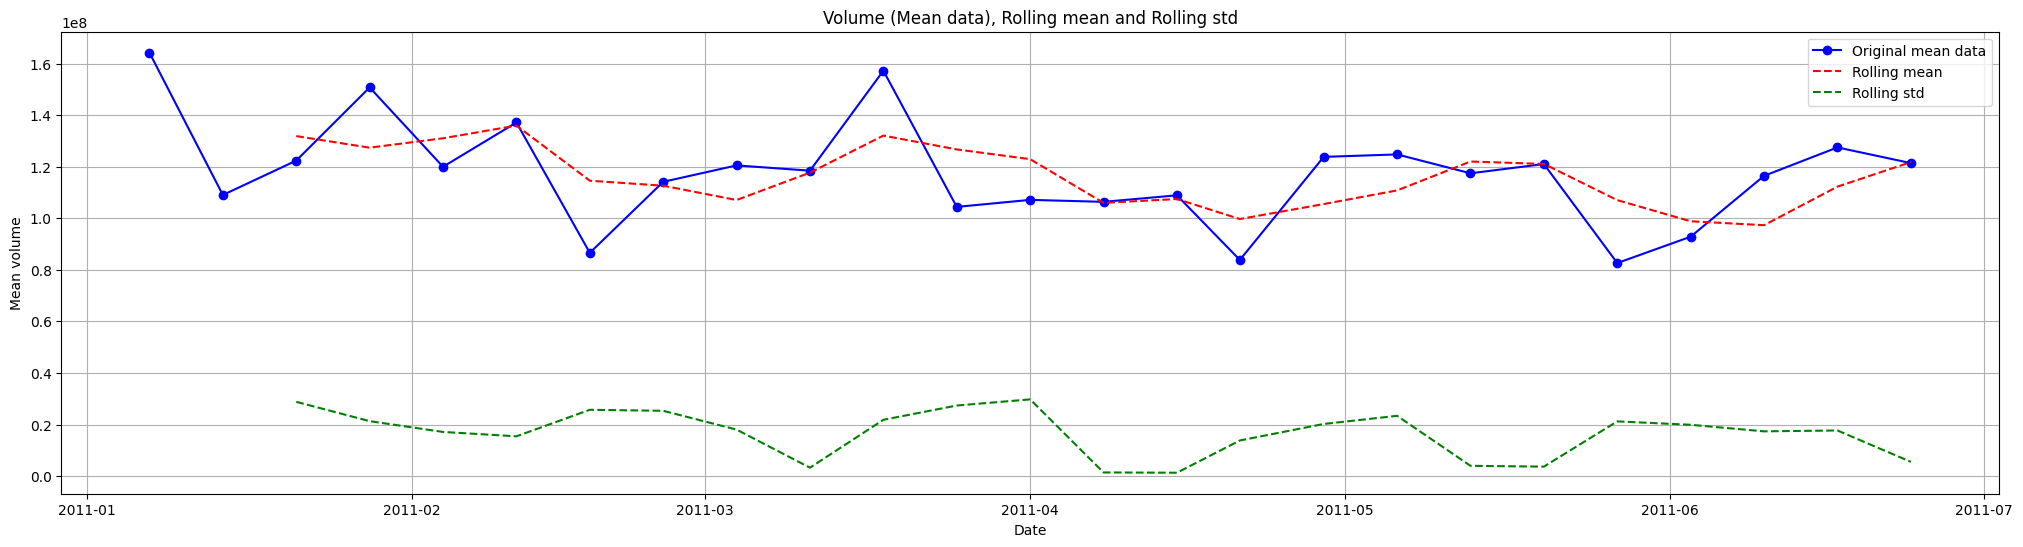

In [18]:
rolling_mean = df_mean['volume'].rolling(window=3).mean()
rolling_std = df_mean['volume'].rolling(window=3).std()

fig = plt.figure(figsize=(25, 6))

original, = plt.plot(df_mean.index, df_mean['volume'], 'bo-',label='Original mean data')
roll_mean, = plt.plot(df_mean.index, rolling_mean, 'r--',label='Rolling mean')
roll_std, = plt.plot(df_mean.index, rolling_std, 'g--',label='Rolling std')

plt.title('Volume (Mean data), Rolling mean and Rolling std')
plt.xlabel('Date')
plt.ylabel('Mean volume')
plt.legend(handles=[original, roll_mean, roll_std])
plt.grid()
plt.show()

### Prueba de Dickey-Fuller

In [23]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_mean['volume'], autolag='AIC')

print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1], )
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.268496
p-value: 0.000006
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636


Debido a que nuestro estadístico de prueba ($\text{ADF Statistic} = -5.27$) es menor que el valor crítico ($\text{Critical Value} = -3.73$), podemos decir que nuestra serie de tiempo es estacionaria.

### Transformación de datos

In [44]:
# Transformación logarítmica
df_log = np.log(df_mean['volume'])

# Reemplazar los valores infinitos por NaN
df_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar los valores NaN
df_log.dropna(inplace=True)

In [45]:
# Media móvil
rolling_mean = df_log.rolling(window=3).mean()

# Sustraer la media móvil de la serie original (transformada logarítmica)
df_log_minus_mean = df_log - rolling_mean

# Eliminar los valores NaN
df_log_minus_mean.dropna(inplace=True)

In [46]:
# Test de Dickey-Fuller para df_log_minus_mean
adf = adfuller(df_log_minus_mean, autolag='AIC')

print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1], )
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.016350
p-value: 0.959864
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691


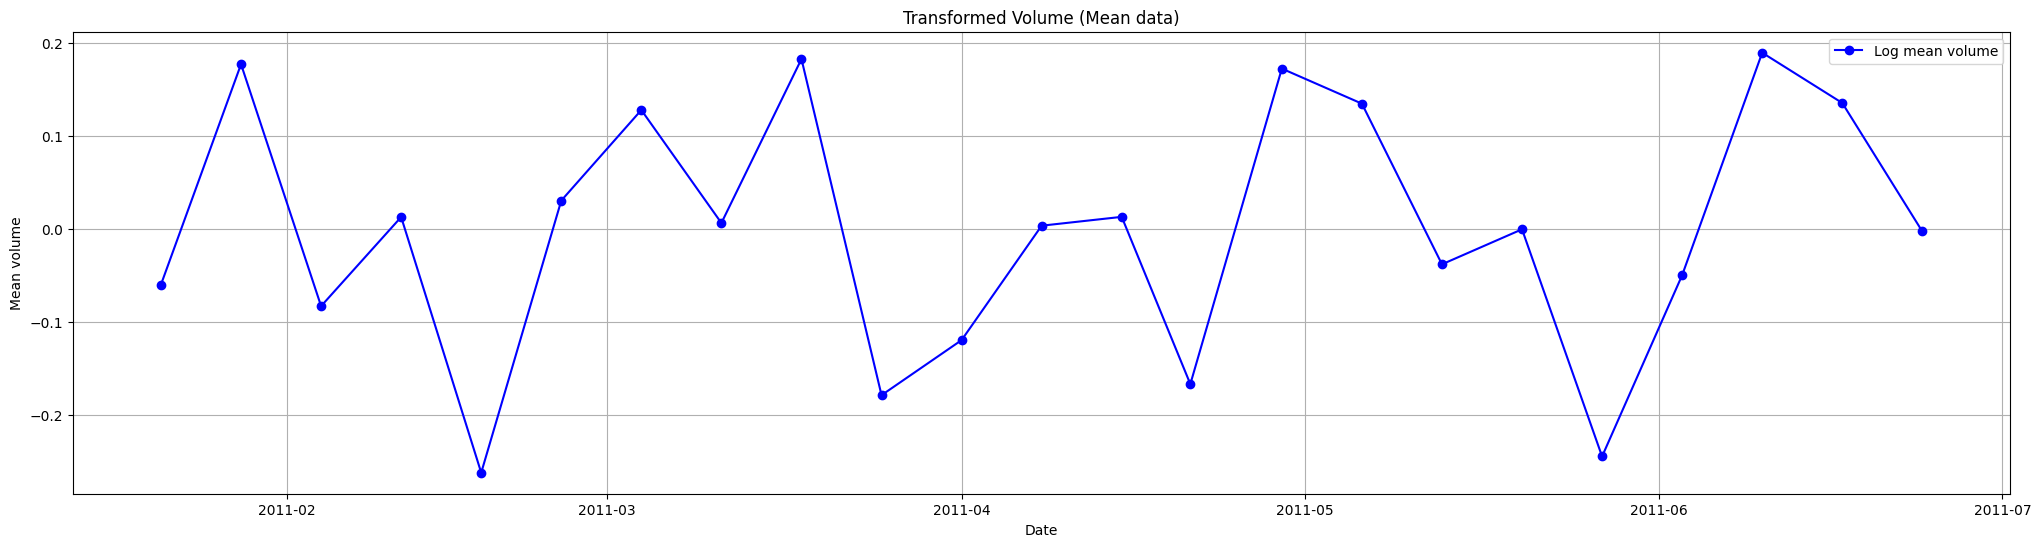

In [52]:
fig = plt.figure(figsize=(25, 6))

plt.plot(df_log_minus_mean.index, df_log_minus_mean, 'bo-',label='Log mean volume')
plt.title('Transformed Volume (Mean data)')
plt.xlabel('Date')
plt.ylabel('Mean volume')
plt.legend()
plt.grid()
plt.show()

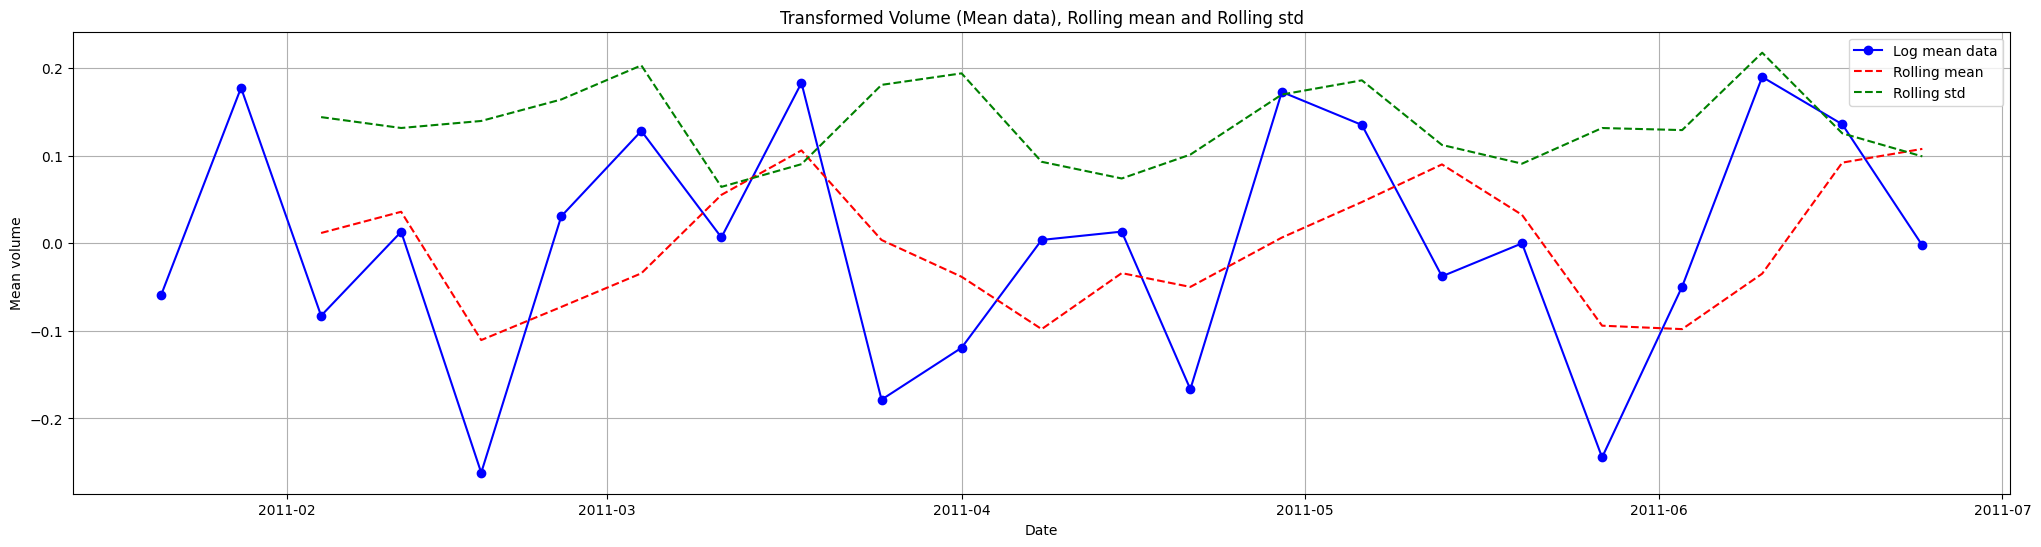

In [54]:
rolling_mean = df_log_minus_mean.rolling(window=3).mean()
rolling_std = df_log_minus_mean.rolling(window=3).std()

fig = plt.figure(figsize=(25, 6))

original, = plt.plot(df_log_minus_mean.index, df_log_minus_mean, 'bo-',label='Log mean data')
roll_mean, = plt.plot(df_log_minus_mean.index, rolling_mean, 'r--',label='Rolling mean')
roll_std, = plt.plot(df_log_minus_mean.index, rolling_std, 'g--',label='Rolling std')

plt.title('Transformed Volume (Mean data), Rolling mean and Rolling std')
plt.xlabel('Date')
plt.ylabel('Mean volume')
plt.legend(handles=[original, roll_mean, roll_std])
plt.grid()
plt.show()

### Definición del modelo

Definición de conjuntos de entrenamiento y prueba

In [26]:
mask = np.random.rand(len(df_mean)) < 0.8

train = df_mean[mask]
test = df_mean[~mask]

print('Train data length: ', len(train))
print('Test data length: ', len(test))

Train data length:  20
Test data length:  5


In [27]:
df_mean.columns

Index(['high', 'low', 'volume', 'percent_change_price', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [29]:
from patsy import dmatrices

expr = 'volume ~ high + low + percent_change_price + month + day_of_week + day'

y_train, X_train = dmatrices(expr, data=train, return_type='dataframe') 
y_test, X_test = dmatrices(expr, data=test, return_type='dataframe')

print(X_train.head(5))
print(y_train.head(5))

            Intercept       high        low  percent_change_price  month  \
date                                                                       
2011-01-07        1.0  52.394333  50.535000              0.533190    1.0   
2011-01-14        1.0  52.315333  50.572000              1.322282    1.0   
2011-01-21        1.0  52.934333  51.229333              0.156960    1.0   
2011-02-04        1.0  53.592333  51.746333              2.099038    2.0   
2011-02-11        1.0  54.679333  52.763000              0.922095    2.0   

            day_of_week   day  
date                           
2011-01-07          4.0   7.0  
2011-01-14          4.0  14.0  
2011-01-21          4.0  21.0  
2011-02-04          4.0   4.0  
2011-02-11          4.0  11.0  
                  volume
date                    
2011-01-07  1.641992e+08
2011-01-14  1.090246e+08
2011-01-21  1.223585e+08
2011-02-04  1.199585e+08
2011-02-11  1.371438e+08


Modelo de regresión de Poisson

In [31]:
import statsmodels.api as sm

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 volume   No. Observations:                   20
Model:                            GLM   Df Residuals:                       14
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7575e+07
Date:                Sun, 05 Nov 2023   Deviance:                   3.5149e+07
Time:                        10:50:42   Pearson chi2:                 3.48e+07
No. Iterations:                    25   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1756 

Predicciones

In [32]:
# Predicciones en el conjunto de prueba
predictions = poisson_training_results.get_prediction(X_test)

predictions_summary_frame = predictions.summary_frame()

/var/folders/tz/klj2d3p15k9fl3ztq50mq0fm0000gn/T/ipykernel_62592/3114517989.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  real, = plt.plot(test.index, real_volume, 'bo-',label='Real volume', color='yellowgreen')


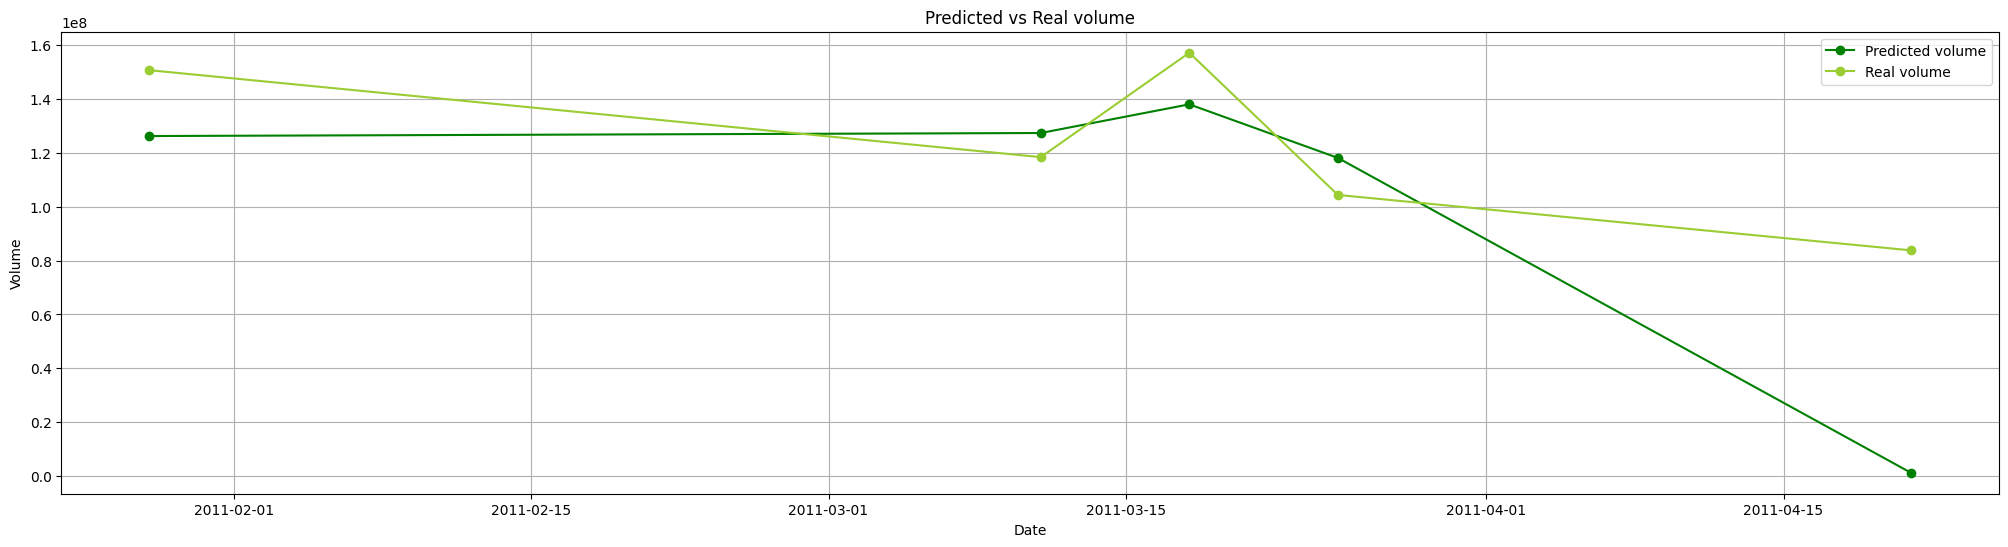

In [35]:
predicted_volume = predictions_summary_frame['mean']
real_volume = y_test['volume']

# Graficar los valores reales vs los predichos
fig = plt.figure(figsize=(25, 6))
predicted, = plt.plot(test.index, predicted_volume, 'go-',label='Predicted volume')
real, = plt.plot(test.index, real_volume, 'bo-',label='Real volume', color='yellowgreen')

plt.title('Predicted vs Real volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(handles=[predicted, real])
plt.grid()
plt.show()

/var/folders/tz/klj2d3p15k9fl3ztq50mq0fm0000gn/T/ipykernel_62592/2056183846.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([real_volume.min(), real_volume.max()], [real_volume.min(), real_volume.max()], 'k--', color='gray', label='Baseline')


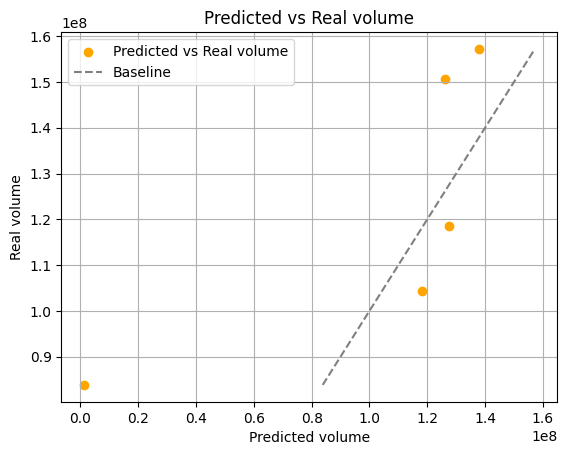

In [43]:
# Scatter plot de los valores reales vs los predichos

fig = plt.figure()
plt.scatter(x=predicted_volume, y=real_volume, color='orange', label='Predicted vs Real volume')

# Linea base
plt.plot([real_volume.min(), real_volume.max()], [real_volume.min(), real_volume.max()], 'k--', color='gray', label='Baseline')

plt.title('Predicted vs Real volume')
plt.xlabel('Predicted volume')
plt.ylabel('Real volume')
plt.legend()
plt.grid()
plt.show()